In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )

In [3]:
pref["感染者数移動平均7"] = pref["各地の感染者数_1日ごとの発表数"].rolling(7).mean()

In [4]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)
pref = pd.merge(pref, pop, on="都道府県名", how="left")


In [5]:
pref["10万人あたり感染者数"] = pref["各地の感染者数_1日ごとの発表数"]/(pref["人口"]/100000)
pref["10万人あたり感染者数移動平均7"] = pref["10万人あたり感染者数"].rolling(7).mean()

In [6]:
pref.tail()

,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計,感染者数移動平均7,人口,10万人あたり感染者数,10万人あたり感染者数移動平均7
22884,2021-05-12,47,沖縄県,109,13361,1,140,84.857143,1481547,7.357175,5.727604
22885,2021-05-13,47,沖縄県,126,13487,0,140,97.285714,1481547,8.504624,6.566495
22886,2021-05-14,47,沖縄県,134,13621,0,140,104.714286,1481547,9.044600,7.067902
22887,2021-05-15,47,沖縄県,160,13781,1,141,114.285714,1481547,10.799522,7.713945
22888,2021-05-16,47,沖縄県,78,13859,0,141,110.714286,1481547,5.264767,7.472884


In [7]:
pref.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22889 entries, 0 to 22888
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   日付                22889 non-null  datetime64[ns]
 1   都道府県コード           22889 non-null  int64         
 2   都道府県名             22889 non-null  object        
 3   各地の感染者数_1日ごとの発表数  22889 non-null  int64         
 4   各地の感染者数_累計        22889 non-null  int64         
 5   各地の死者数_1日ごとの発表数   22889 non-null  int64         
 6   各地の死者数_累計         22889 non-null  int64         
 7   感染者数移動平均7         22883 non-null  float64       
 8   人口                22889 non-null  int64         
 9   10万人あたり感染者数       22889 non-null  float64       
 10  10万人あたり感染者数移動平均7  22883 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(1)
memory usage: 2.1+ MB


In [8]:
prefs = {
    "東京都": ("-",1.1),
    "大阪府": ("-",1.1),
    "京都府": ("-",1.1),
    "兵庫県": ("-",1.1),
    "愛知県": ("-",1.1),
    "福岡県": ("-",1.1),
    "北海道": ("-",1.1),
    "岡山県": ("-",1.1),
    "広島県": ("-",1.1),
    "埼玉県": ("--",1.0),
    "千葉県": ("--",1.0),
    "神奈川県": ("--",1.0),
    "沖縄県": ("--",1.0),
    "岐阜県": ("--",1.0),
    "愛媛県": ("--",1.0),
    "三重県": ("--",1.0),
    "石川県": ("--",1.0),
    "群馬県": ("--",1.0),
    "熊本県": ("--",1.0),
    "大分県": (":",1.0),
    "佐賀県": (":",1.0),
    "奈良県": (":",1.0),
    "宮城県": (":",1.0),
    "富山県": (":",1.0),
}

In [9]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


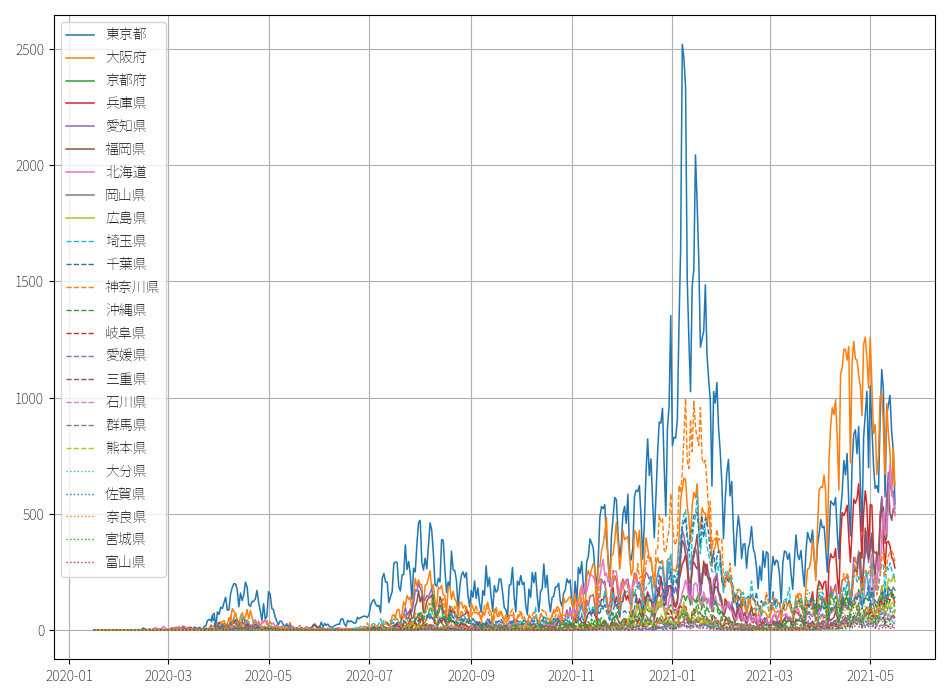

In [10]:
plt.figure(figsize=(9.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["各地の感染者数_1日ごとの発表数"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend()
plt.tight_layout()

<IPython.core.display.Javascript object>


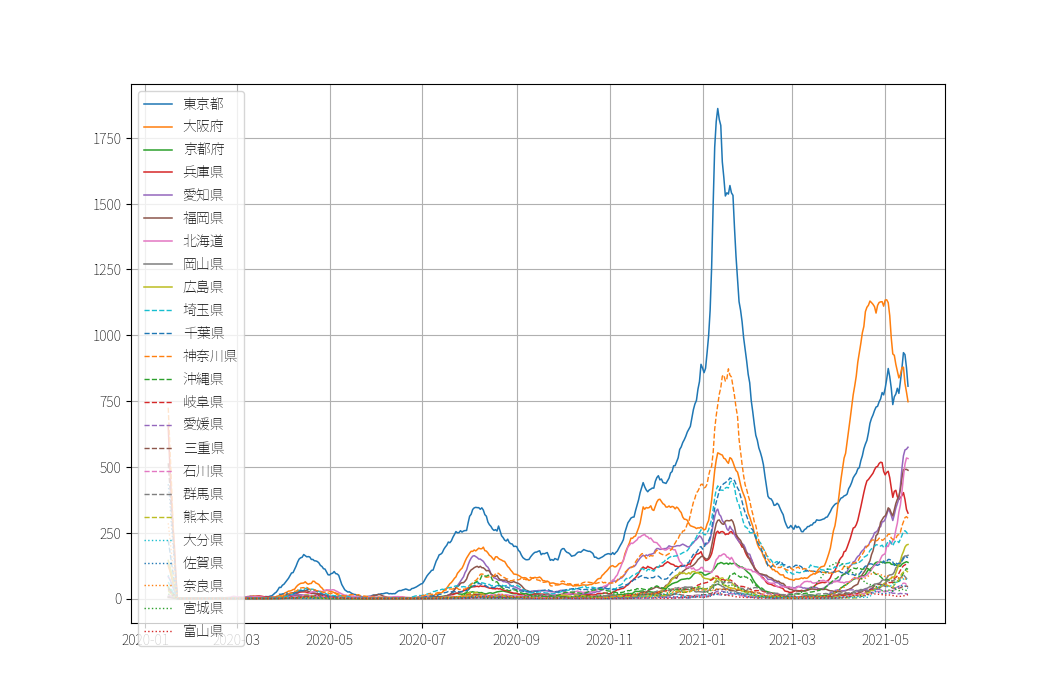

In [11]:
plt.figure(figsize=(10.5,7))
dates = pref["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref.loc[pref["都道府県名"]==p]["感染者数移動平均7"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend()

<IPython.core.display.Javascript object>


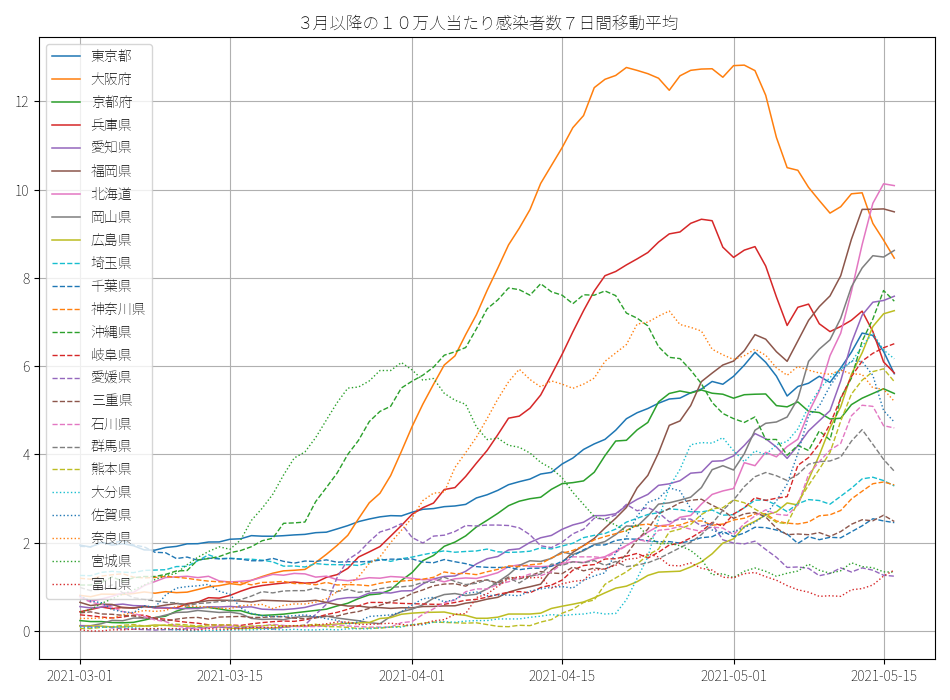

In [12]:
plt.figure(figsize=(9.5,7))
plt.title("３月以降の１０万人当たり感染者数７日間移動平均")
pref_latest = pref.loc[pref["日付"]>="20210301"]
dates = pref_latest["日付"].unique()
for p in prefs:
    plt.plot_date(dates,pref_latest.loc[pref_latest["都道府県名"]==p]["10万人あたり感染者数移動平均7"],label=p, fmt=prefs[p][0], lw=prefs[p][1])
plt.grid()
plt.legend()
plt.tight_layout()